# 1.BUSINESS UNDERSTANDING

## **1.1 BUSINESS OVERVIEW**

A telecommunications company is an orgainization that provides services for long distance communication. They do this by building and mainatining  the physical networks, like cell towers, that transmit signals to individuals and businesses.These companies facilitate essential services like accessing the internet, making phone calls and sending messages. They make money through customer subscriptions and usage fees for these services.SyriaTel is a telecom company that provides call,text and data services to customers. 
One advantage of working with this company is that it is a high-performing sector that contributes to economic growth, potentially increasing returns for investors. Telecommunications is also an essential service with steady demand, making it stable and a valuable industry to be part of.
However, the telecom industry is highly competitive and customers can easily switch to other providers if they're dissatisfied. This creates a high risk of
customer churn, which can reduce revenue and can discourage investor confidence if not properly managed.



## **1.2 PROBLEM STATEMENT**
SyriaTel is losing customers to competitors, by analysing customer data, we can predict churn and uncover the reasons why customers leave, so SyriaTel can take action to reduce churn and improve customer retention.

This is costly because:

*Revenue loss:* Each customer lost means recurring revenue lost.

*High acquisition cost:* It is more expensive to acquire a new customer than to retain an exsisting one.

*Competitive pressure:* In a competetive market, reducing churn is critical for survival and growth.

If we can predict which customers are likely to leave, SyriaTel can take action early eg. giving offers, improving services,or solving problems to make those customers stay.

So the goal is to reduce churn and keep loyal customers.


## **1.3 BUSINESS OBJECTIVES**

 ## 1.3.1 *Main objective:*
To predict customer churn and provide insights that help SyriaTel keep its customers  and reduce revenue loss.

 ## 1.3.2 *Specific objectives:*

1. To develop a model that predicts whether a customer will churn or stay.
2. To identify the key factors eg. call charges, service quality or customer complaints that influence the probability of a customer to churn or not to churn.
3. To provide insights that SyriaTel can use to design strategies for reducing churn and improving customer satisfaction.
4. To determine the state with the highest churning rate.



 ## 1.3.3*Research questions*
1. Can we accurately predict which syriaTel customers are likely to churn using their demographic and usage data?
2. What are the main factors that influence customer churn?
3. How can SyriaTel use the model's prediction and insights to design strategies that reduce churn and retain more customers?

## **1.4 SUCCESS CRITERIA**
 ***Model performance***
The churn prediction model achieves a good level of accuracy and balances correctly identifying customers who churn and those who stay.
 ***Insights gained***
The analysis clearly identifies the key factors that contribute to churn eg. high call charges and frequent complains.
 ***Business value***
SyriaTel can use the model's results to take practical actions, such as designing loyalty offers or improving customer service which can help improve customer churn.


# 2. DATA UNDERSTANDING
***Target variable:*** churn (Yes/No → whether a customer left or not).

***Features (examples):***

-Demographics: state, area code, international plan, voicemail plan.

-Usage behavior: total minutes, total calls, total charges (day, evening, night, international).

-Customer service: number of customer service calls made.

***Observations:***

-Customers with many customer service calls might be more likely to churn.

-High charges or international plans could also influence churn.

-The dataset combines both numeric and categorical features.

***Purpose of the data:***

-To understand customer behavior.

-To find patterns linked to churn.

-To train and test a prediction model.

# 3. DATA EXPLORATION

# 3.1 Loading a dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv("Syria_Tel.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

Our dataset has *3333* rows and *21* columns .

Let's check for any missing values in our dataset.

In [4]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Since our dataset doesn't have any missing values we don't have to drop any null or fill for missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Let's drop the `phone number` column since it is not useful in our prediction.

# 3.2 Data cleaning

In [6]:
#dropping a column
df = df.drop(columns =['phone number'])


In [7]:
df.shape

(3333, 20)

We need to check for categorical data in our dataset so that we can perform **one hot encoding** which is an important step for us to make predictions and create Machine learning models.

In [8]:
#checking for categorical values
categorical_cols = df.select_dtypes(include=["object"]).columns
print(categorical_cols)


Index(['state', 'international plan', 'voice mail plan'], dtype='object')


`state`, `international plan` and `voice mail plan` are the columns that are categorical and we need to perfom one hot encoding on 

In [9]:
df["international plan"].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [10]:
df["voice mail plan"].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [11]:
# One-hot encode both binary categorical columns
df_encoded = pd.get_dummies(df,columns=["international plan", "voice mail plan"],drop_first=True,dtype=int)
df_encoded.head()



,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,1
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0


Encoding `state` into 50 dummy columns might not be the recommended way to go about it because it will make it harder for the model to interpret and cause **multicollinearity**, So for this `state` column we took a different approach.

In [14]:
df_encoded["state"].value_counts().head(7)

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
Name: count, dtype: int64

In [15]:
df_encoded["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

For uniformity i wanna change the contents of this columns to 0 and 1 to match the new encoded columns.

In [16]:
#convert entries
df_encoded["churn"] = df_encoded["churn"].map({True: 1, False: 0})


In [17]:
df_encoded["churn"].unique()

array([0, 1], dtype=int64)

In [18]:
df_encoded.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,0.096910,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,0.295879,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,0.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000


In [19]:
df.groupby("churn")["account length"].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,2850.0,100.793684,39.88235,1.0,73.0,100.0,127.0,243.0
True,483.0,102.664596,39.46782,1.0,76.0,103.0,127.0,225.0


Let's check for class imbalance in our dependent variable `churn`

In [20]:
df_encoded["churn"].value_counts(normalize = True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

There is clearly a class imbalance on this column with **85.5%** of the data going to 0 (stay) while the other **14.49%** going to churn and this might not give a correct representation of our model prediction.

In [21]:
#let's check for multicollinearity
corr = df_encoded.corr(numeric_only = True)

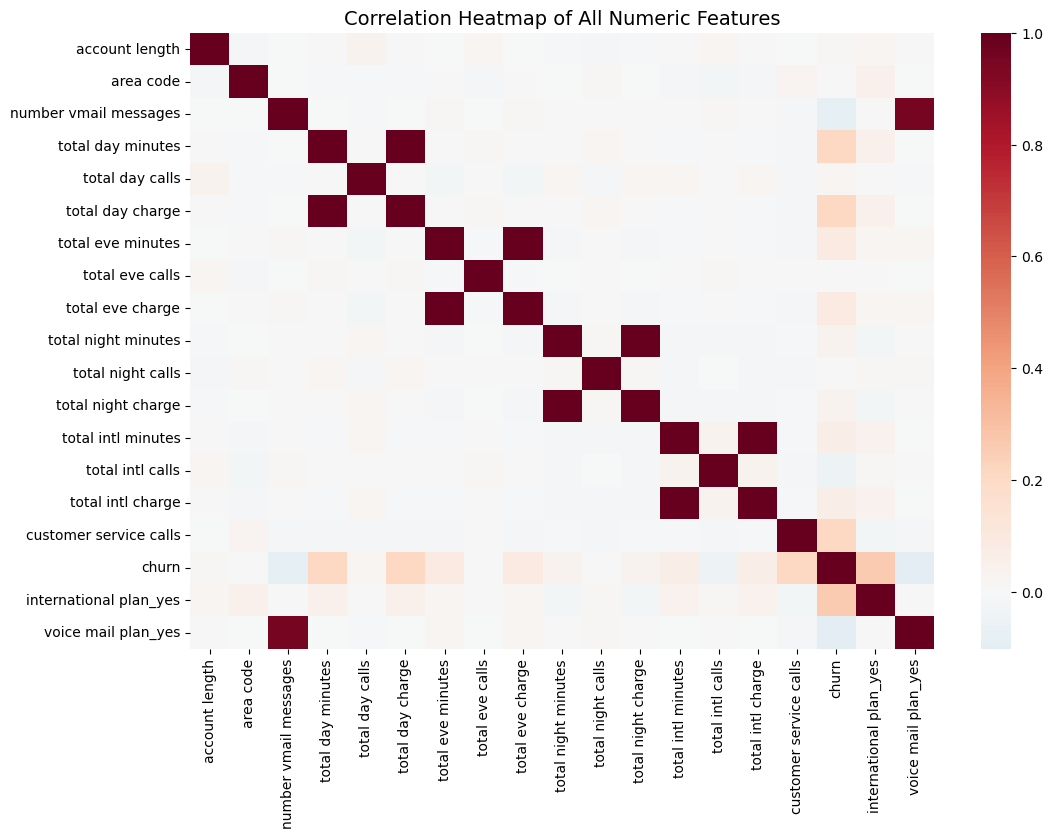

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)
plt.title("Correlation Heatmap of All Numeric Features",fontsize = 14)
plt.show()


Let's check for feature distributions and decide whether to perform log transformation or other normalizations before modelling.

In [23]:
df_encoded.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,0.096910,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,0.295879,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,0.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000


Every other column seems to have a n even distribution or little to know skewness.But let's take a look at `number vmail messages` whose most customers have 0 messages but some have upto 51 messages.

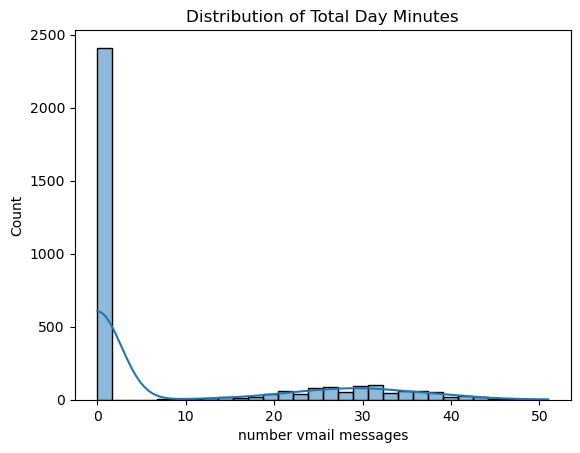

In [24]:
sns.histplot(df_encoded["number vmail messages"], kde=True, bins=30)
plt.title("Distribution of Total Day Minutes")
plt.show()

In [25]:
df_encoded["log_vmail_messages"] = np.log1p(df_encoded["number vmail messages"])

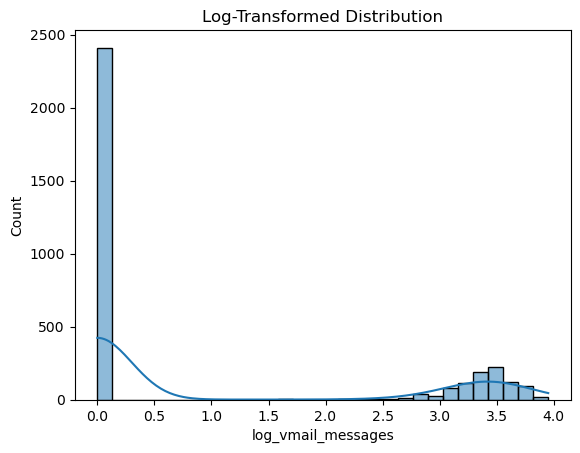

In [26]:
sns.histplot(df_encoded["log_vmail_messages"], kde=True, bins=30)
plt.title("Log-Transformed Distribution")
plt.show()

 # 3.4 Feature engineering

Some of the features are communicate the same 

In [27]:
df_encoded["total_minutes"] = df_encoded["total day minutes"] + df_encoded["total eve minutes"] + df_encoded["total night minutes"]
df_encoded["total_calls"] = df_encoded["total day calls"] + df_encoded["total eve calls"] + df_encoded["total night calls"] 
df_encoded["total_charge"] = df_encoded["total day charge"] + df_encoded["total eve charge"] + df_encoded["total night charge"] 



In [28]:
cols_to_drop =["total day minutes", "total eve minutes", "total night minutes", "total day calls", "total eve calls", "total night calls",
    "total day charge", "total eve charge", "total night charge"]

In [29]:
df_encoded = df_encoded.drop(columns = cols_to_drop)

In [30]:
df_encoded.head()

,state,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes,log_vmail_messages,total_minutes,total_calls,total_charge
0,KS,128,415,25,10.0,3,2.70,1,0,0,1,3.258097,707.2,300,72.86
1,OH,107,415,26,13.7,3,3.70,1,0,0,1,3.295837,611.5,329,55.54
2,NJ,137,415,0,12.2,5,3.29,0,0,0,0,0.000000,527.2,328,59.00
3,OH,84,408,0,6.6,7,1.78,2,0,1,0,0.000000,558.2,248,65.02
4,OK,75,415,0,10.1,3,2.73,3,0,1,0,0.000000,501.9,356,49.36


# 4. EXPLANATORY DATA ANALYSIS

In [38]:
#Convert Churn to an Integer Type
df['churn'] = df['churn'].astype(int)

# Group by state and churn counts
state_churn = df.groupby(["state", "churn"]).size().unstack(fill_value=0)

# Add churn rate per state
state_churn["churn_rate"] = state_churn[1] / (state_churn[0] + state_churn[1])

# Sort by churn rate (descending)
state_churn = state_churn.sort_values(by="churn_rate", ascending=False)

print("Top 10 states with the highest churn rate:")
print(state_churn.head(10)) # show top 10 states with highest churn rate



Top 10 states with the highest churn rate:
churn   0   1  churn_rate
state                    
NJ     50  18    0.264706
CA     25   9    0.264706
TX     54  18    0.250000
MD     53  17    0.242857
SC     46  14    0.233333
MI     57  16    0.219178
MS     51  14    0.215385
NV     52  14    0.212121
WA     52  14    0.212121
ME     49  13    0.209677


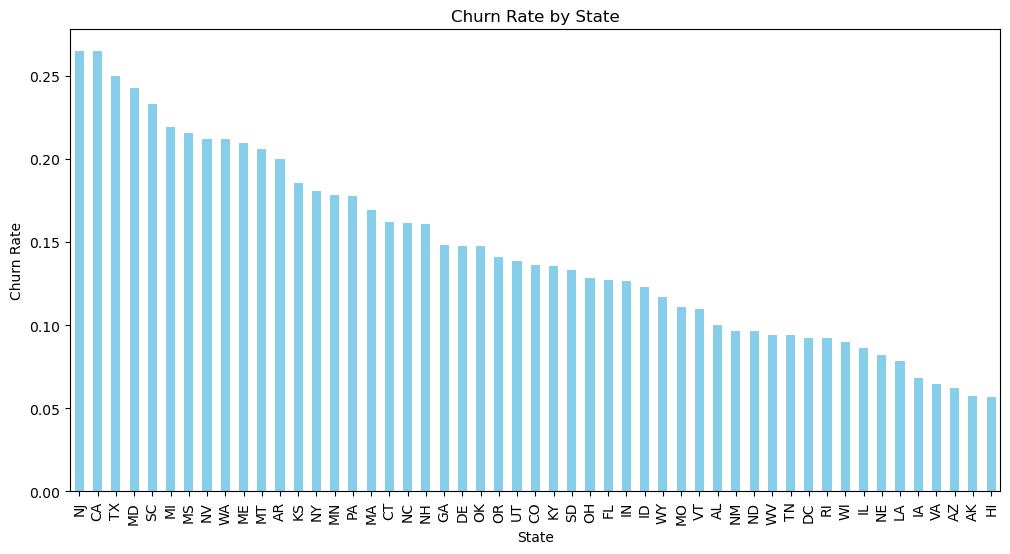

In [39]:
plt.figure(figsize=(12,6))
state_churn["churn_rate"].plot(kind="bar", color="skyblue")
plt.title("Churn Rate by State")
plt.ylabel("Churn Rate")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()


# 5. MODELLING

## 5.1 LOGISTIC REGRESSION

Let's move to creating models,specifically a logistic regression model because the problem we are trying to answer is a binary classification and we are also trying to answer the question **what is the probability of a customer to churn or not to churn?** depending on various features.

Before moving to the modelling bit of things we first have to do **feature selection** and also look at our predictor variable `churn`, So as to create our baseline model.

In [31]:
df_encoded['churn'].value_counts(normalize =True)*100

churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

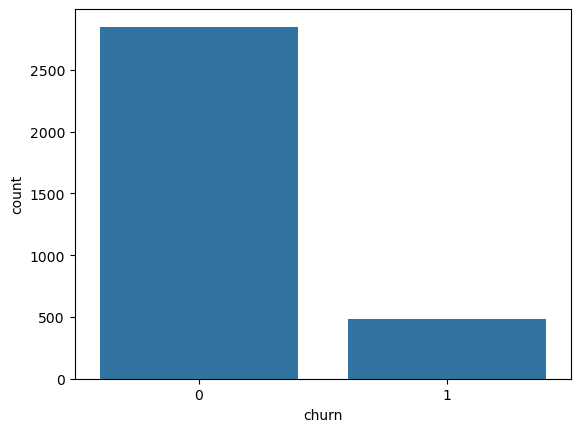

In [32]:
sns.countplot(x="churn", data=df_encoded)
plt.show()

As you can see from the above visual,the target variable is highly imbalanced.The class 0 has a percentage of **85.5%** while our class 1 has **14.49%** .It shows that 85% of the customers stayed while 14.49% churned which we must address during model training to avoid biased predictions.

Since `churn` is binary we can compute **Pearson correlation** between churn and other features before doing Logistic regression. 

In [34]:
# Only keep numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Correlation with churn
churn_corr = numeric_df.corr()["churn"].sort_values(ascending=False)
print(churn_corr)


churn                     1.000000
international plan_yes    0.259852
total_charge              0.226962
customer service calls    0.208750
total_minutes             0.196457
total intl charge         0.068259
total intl minutes        0.068239
total_calls               0.019651
account length            0.016541
area code                 0.006174
total intl calls         -0.052844
number vmail messages    -0.089728
log_vmail_messages       -0.098991
voice mail plan_yes      -0.102148
Name: churn, dtype: float64


Let's visualize this correlation to `churn` column which is our dependent feature.

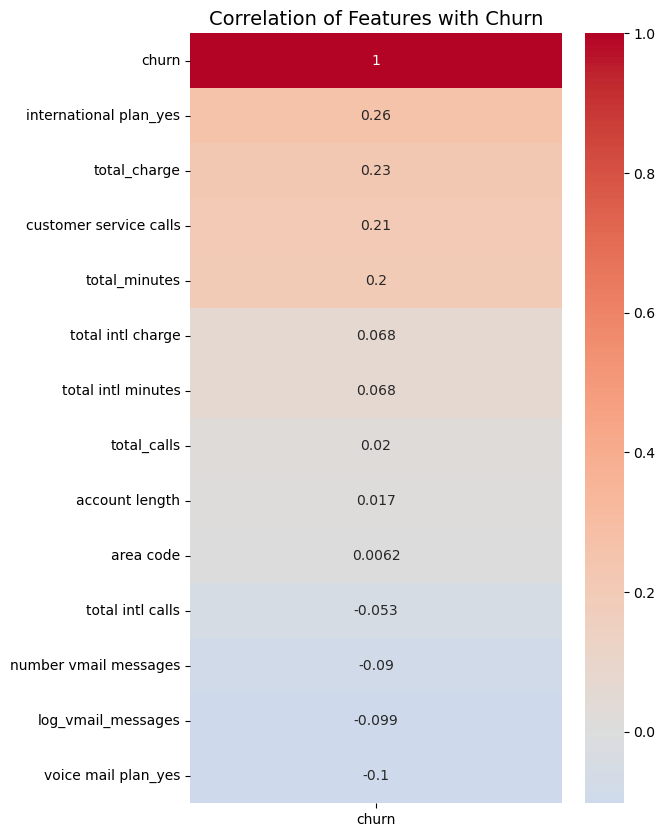

In [35]:
#convert to Dataframe for heatmap
churn_corr_df = churn_corr.to_frame()
#plot heatmap
plt.figure(figsize=(6,10))
sns.heatmap(churn_corr_df, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation of Features with Churn", fontsize=14)
plt.show()

We will be using Positive correlation features because they tell us who is likely to churn while Negaative correlation features tell us who is likely to stay.

In [36]:
#sklearn model import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,roc_curve



In [37]:
#top 4 positive correlatrion with churn
selected_features =["international plan_yes","total_charge" ,"customer service calls" ,"total_minutes"]           

In [38]:
#independent and dependent variables
X = df_encoded[["international plan_yes","total_charge","customer service calls" ,"total_minutes"]]          
y = df_encoded["churn"]

In [39]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y ensures the churn ration is preserved in both train and test
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
#fit the model
log_reg.fit(X_train, y_train)
#let's predict
y_pred = log_reg.predict(X_test)


In [40]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)

                  Feature  Coefficient
0  international plan_yes     2.334522
2  customer service calls     0.623310
1            total_charge     0.079435
3           total_minutes    -0.000756


In [41]:
y_proba = log_reg.predict_proba(X_test)[:, 1]  # probability of churn (class 1)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7616191904047976
Precision: 0.35096153846153844
Recall: 0.7525773195876289
F1 Score: 0.4786885245901639
ROC-AUC: 0.8076143968167843

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85       570
           1       0.35      0.75      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667



**Accuracy score:**

We have an accuracy score of 76% which means about 76% of predictions are correct.But because the dataset is imbalanced accuracy alone is misleading.

**recall:**

The model correctly identifies 75% of true churners meaning the model is good at catching churners even though it misses about 25%.

**Precision :**

Out of all the customers predicted as churners, only 35% actually churn meaning it gives a high number of false positives.It therefore predicts churn when the customer stays.

This model is better at finding churners (high recall) than being precise about them (low precision).
This means:

We will catch most customers who are likely to churn,but also flag many who wouldn’t have churned (false alarms).


Let's visualize our ROC-AUC for more understanding of our model.

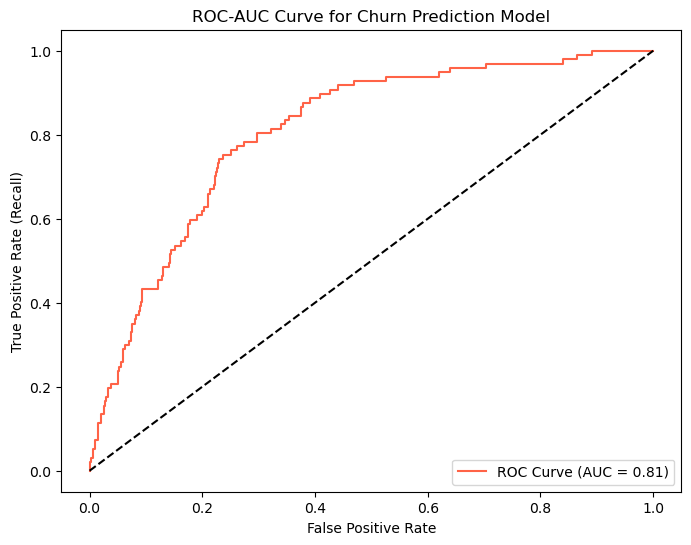

In [43]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="tomato")
plt.plot([0,1], [0,1], linestyle="--", color="black")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve for Churn Prediction Model")
plt.legend(loc="lower right")
plt.show()

Our ROC curve lies well above the diagonal, meaning the model does a good job distinguishing churners from non-churners.It has an AUC = 0.81 which is good and shows a that our model is highly predictive but has room for growth.


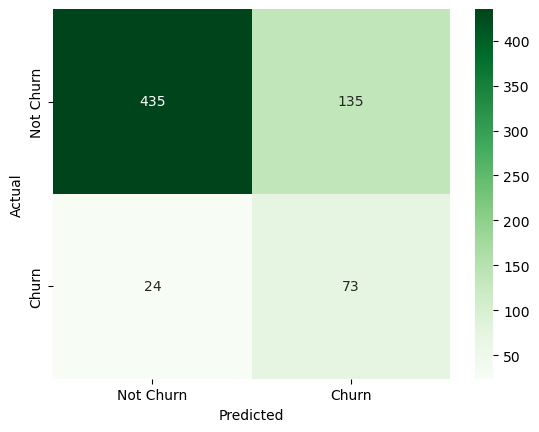

In [44]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Not Churn", "Churn"],
            yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Top-left cell: customers correctly predicted as “stay”(True positive).

Bottom-right cell: customers correctly predicted as “churn”(True negative).

Top-right cell: customers predicted to churn but actually stayed (false positives).

Bottom-left cell: customers predicted to stay but actually churned (false negatives).


## LOGISTIC REGRESSION WITH ALL FEATURES.

We want to check whether adding more information improves the model compared to the baseline.For features we are using all the predictores available in the dataset excluding the target variable. We'll first onehotencode the multi-categorical variable state to have a smooth flow.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


Let's split and train our model.

In [48]:
# Separate features and target
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [49]:
df_encoded.columns

Index(['state', 'account length', 'area code', 'number vmail messages',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'international plan_yes',
       'voice mail plan_yes', 'log_vmail_messages', 'total_minutes',
       'total_calls', 'total_charge'],
      dtype='object')

We will have to **OneHotEncode** our multi-categorical variable after conducting a split so that it ensures encoding happens after splitting, with no leakage.

In [57]:
#encode state 
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit on train, transform both train & test
X_train_state = encoder.fit_transform(X_train[["state"]])
X_test_state = encoder.transform(X_test[["state"]])

Now scale the the numeric features after encoding `state`

In [58]:
# all numeric features
numeric_features = ['account length', 'area code', 'number vmail messages',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'international plan_yes',
       'voice mail plan_yes', 'log_vmail_messages', 'total_minutes',
       'total_calls', 'total_charge']

In [59]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

In [62]:
#combine encoded vs numeric 
X_train_final = np.hstack([X_train_state, X_train_num])
X_test_final = np.hstack([X_test_state, X_test_num])

#fit the model
model = LogisticRegression(max_iter=1000, random_state=42,class_weight="balanced")
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)
y_pred_proba = model.predict_proba(X_test_final)[:,1]

In [63]:
# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7496251874062968
Precision: 0.3317307692307692
Recall: 0.711340206185567
F1-score: 0.4524590163934426
ROC-AUC: 0.8076143968167843

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.33      0.71      0.45        97

    accuracy                           0.75       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.75      0.78       667



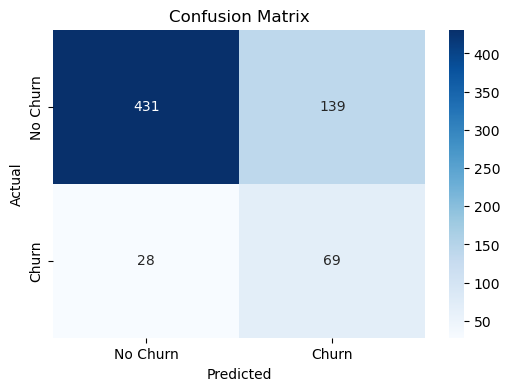

In [64]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

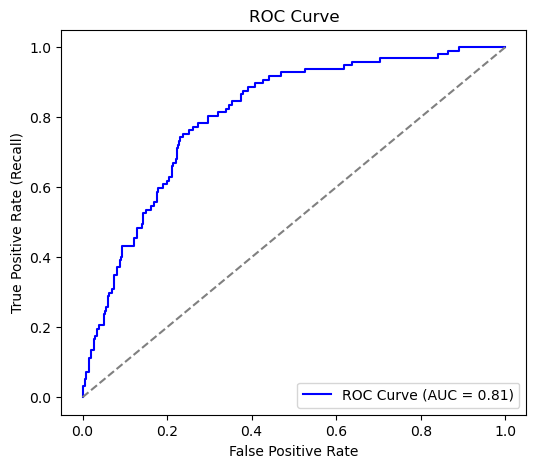

In [65]:
# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# DECISIONTREE CLASSIFIER

Let's build another model to perform classification ,in this case a DecisionTree Classifier .

In [67]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_encoded["state_encoded"] = enc.fit_transform(df_encoded[["state"]])


In [72]:
df_encoded = df_encoded.drop(["state"],axis=1)
df_encoded.head()

KeyError: "['state'] not found in axis"

In [73]:
# Compute correlations with target
corr_target = df_encoded.corr()['churn']

# Select only positive correlations (excluding the target itself)
positive_corr_features = corr_target[corr_target > 0].index.tolist()
positive_corr_features.remove('churn')

print("Positively correlated features:", positive_corr_features)


Positively correlated features: ['account length', 'area code', 'total intl minutes', 'total intl charge', 'customer service calls', 'international plan_yes', 'total_minutes', 'total_calls', 'total_charge', 'state_encoded']


In [74]:
X = df_encoded[positive_corr_features]
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [75]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and fit
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.888
Precision: 0.609271523178808
Recall: 0.6344827586206897
F1 Score: 0.6216216216216216

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       855
           1       0.61      0.63      0.62       145

    accuracy                           0.89      1000
   macro avg       0.77      0.78      0.78      1000
weighted avg       0.89      0.89      0.89      1000



In [77]:
y_proba = dt.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.7827384553337366


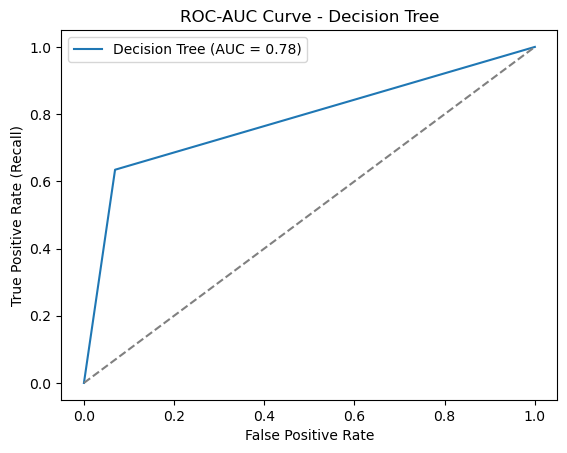

In [78]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve - Decision Tree")
plt.legend()
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best ROC-AUC: 0.8923156222426126


In [80]:
dt_parms = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42,criterion = "entropy")
dt_parms.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

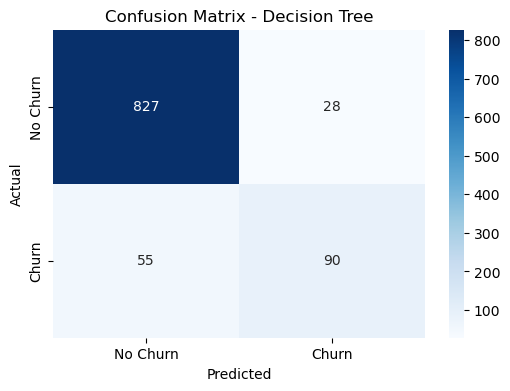

In [82]:
y_pred = dt_parms.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

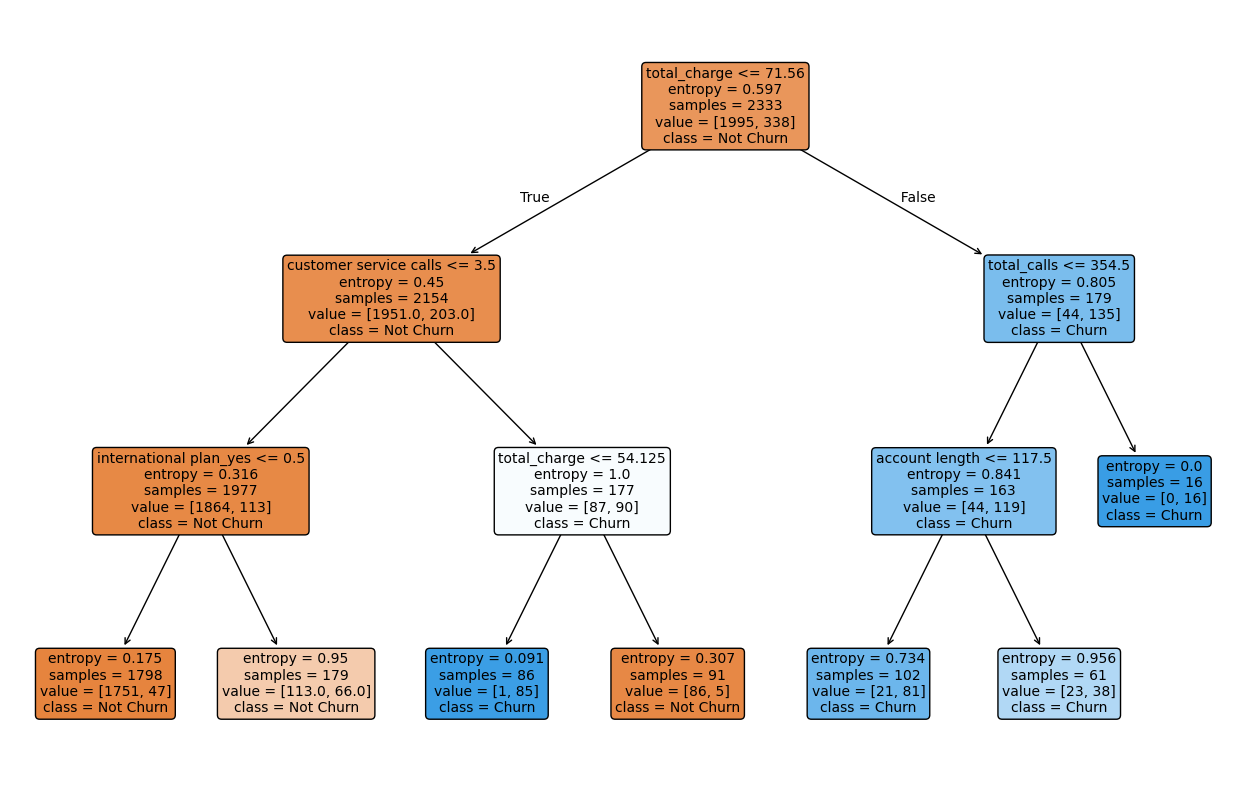

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
tree.plot_tree(
    dt_parms,
    feature_names=positive_corr_features, 
    class_names=['Not Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


Accuracy BEFORE pruning: 0.9170


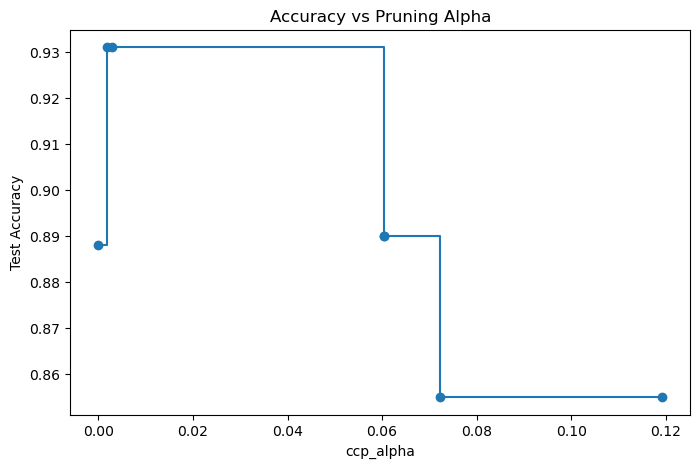

Best alpha: 0.001720
Accuracy AFTER pruning: 0.9310


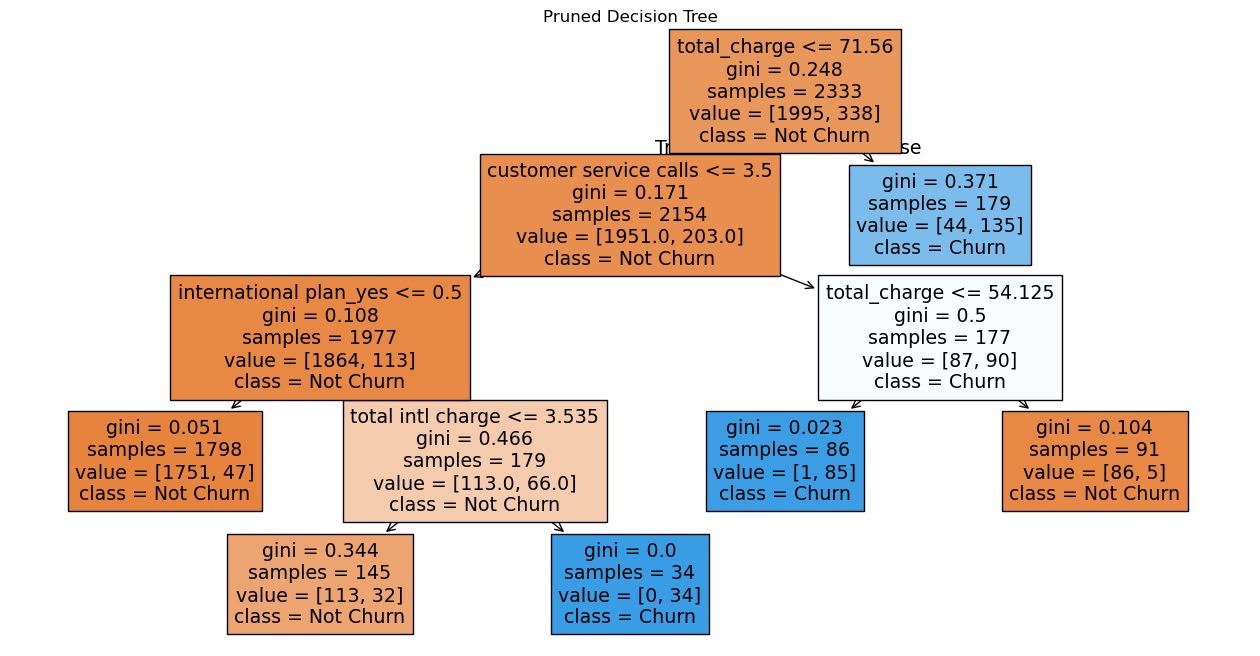

In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Predictions & accuracy before pruning
y_pred = dt_parms.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)
print(f"Accuracy BEFORE pruning: {acc_before:.4f}")

# ---- Cost Complexity Pruning ----
path = dt_parms.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate on test set
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot accuracy vs alpha
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, acc_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Pruning Alpha")
plt.show()

# Pick the best alpha (highest test accuracy)
best_alpha = ccp_alphas[acc_scores.index(max(acc_scores))]
print(f"Best alpha: {best_alpha:.6f}")

# Train final pruned tree
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

# Predictions & accuracy after pruning
y_pred_pruned = dt_pruned.predict(X_test)
acc_after = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy AFTER pruning: {acc_after:.4f}")

# ---- Plot the pruned tree ----
plt.figure(figsize=(16,8))
plot_tree(dt_pruned, filled=True, feature_names=X_train.columns, class_names=["Not Churn", "Churn"])
plt.title("Pruned Decision Tree")
plt.show()


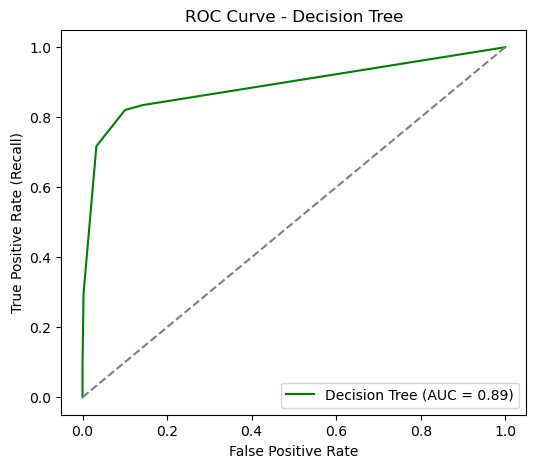

In [87]:
y_proba_dt = dt_pruned.predict_proba(X_test)[:, 1]
# ROC values
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_proba_dt)

# AUC score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color="green")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()


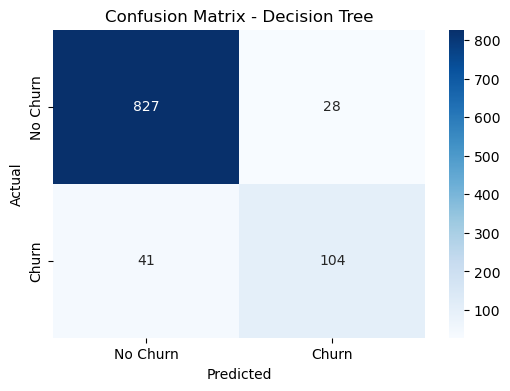

In [85]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_pruned)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# RANDOM FOREST MODEL 

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
# churn = target variable

X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [94]:
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # grow deep trees
    random_state=42,
    class_weight="balanced" # handle imbalance
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [96]:
# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.962
Precision: 0.9652173913043478
Recall: 0.7655172413793103
F1-score: 0.8538461538461538
ROC-AUC: 0.9086872353297035

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       855
           1       0.97      0.77      0.85       145

    accuracy                           0.96      1000
   macro avg       0.96      0.88      0.92      1000
weighted avg       0.96      0.96      0.96      1000



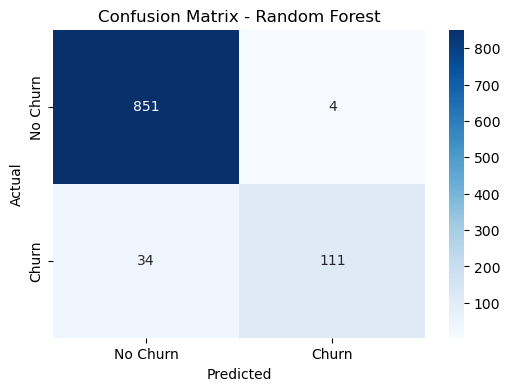

In [97]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn","Churn"],
            yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


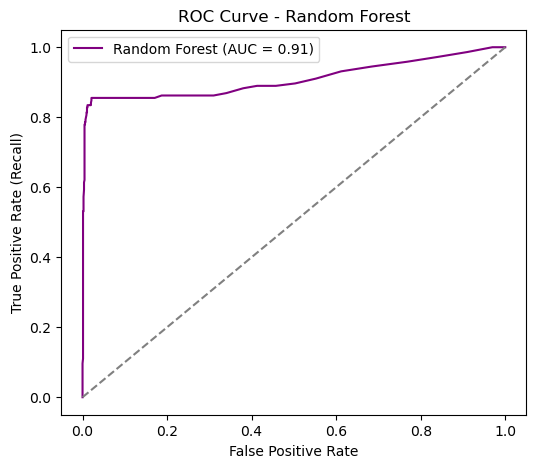

In [98]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color="purple")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],           # number of trees
    'max_depth': [None, 10, 20, 30],           # depth of each tree
    'min_samples_split': [2, 5, 10],           # min samples to split a node
    'min_samples_leaf': [1, 2, 4],             # min samples per leaf
    'max_features': ['sqrt', 'log2', None],    # features considered at each split
    'class_weight': [None, 'balanced']         # handle class imbalance
}


In [ ]:
# Base model
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold CV using ROC-AUC as scoring
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC-AUC Score:", grid_search.best_score_)


In [ ]:
# Get best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test_final)
y_proba = best_rf.predict_proba(X_test_final)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


# EVALUATION